<a href="https://colab.research.google.com/github/yuki-2000/Image_processing_lecture/blob/main/IP2022_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 初期設定（このセルの中身は触らなくて良い）
import numpy as np # 数値解析パッケージnumpyのimport
import cv2 # 画像処理パッケージopencvのimport
import matplotlib.pyplot as plt # 描画パッケージmatplotlibのimport
import imutils

# Google Colab固有の設定
from google.colab import files
from google.colab.patches import cv2_imshow

# Google driveのmount
from google.colab import drive
drive.mount('/content/drive/')
# Google Colab用directoryに移動
%cd "/content/drive/MyDrive/Colab Notebooks/画像処理/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/画像処理


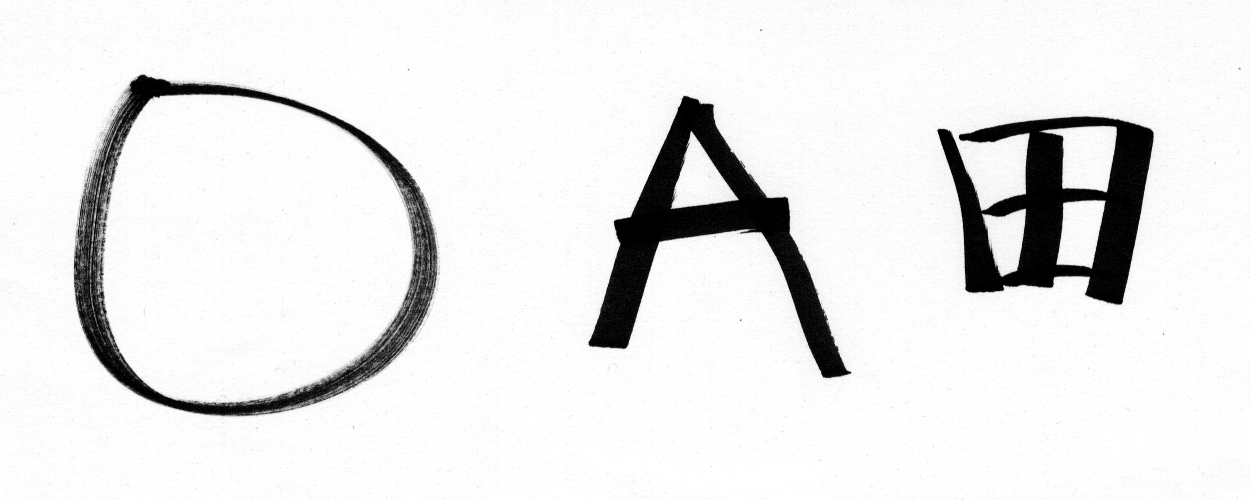

In [ ]:
### 1-1a: 画像の読込と表示（このセルの中身は触らなくて良い）

img1 = imutils.url_to_image('https://bit.ly/3TduyO5',cv2.IMREAD_GRAYSCALE)

# 読み込めなかった場合の例外処理
if img1 is None:
  print('Image file not found.')

img2 = imutils.url_to_image('https://bit.ly/3SeROtK',cv2.IMREAD_GRAYSCALE)

# 読み込めなかった場合の例外処理
if img2 is None:
  print('Image file not found.')

# 画像を並べて表示
figure = np.hstack((img1, img2))
cv2_imshow(figure)


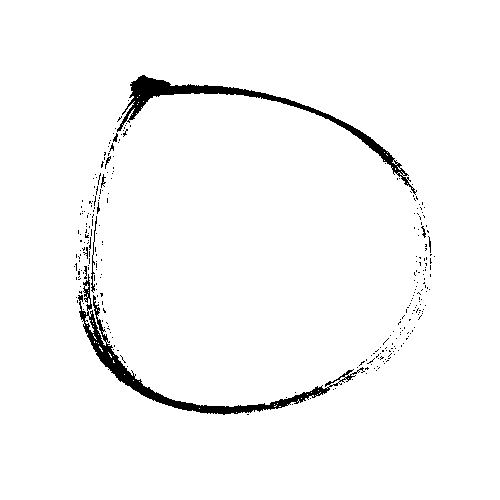

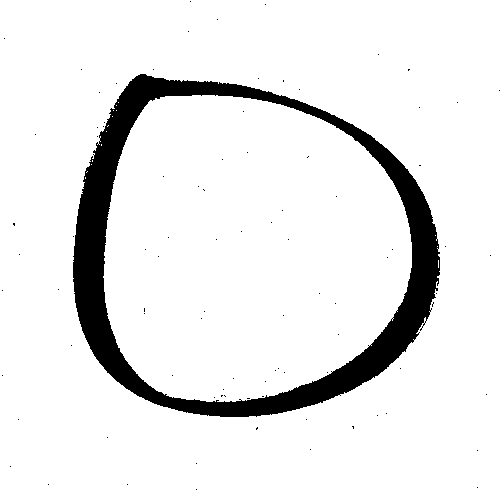

In [ ]:
### 4-1: 固定閾値による方法

# 準備
rows,cols =img1.shape # 画像の大きさを取得
bin_img1_1 = np.zeros((rows,cols), np.uint8) # 2値化結果を記録する白い画像を用意
bin_img1_2 = np.zeros((rows,cols), np.uint8) # 2値化結果を記録する白い画像を用意

# 閾値の例1
Threshold = 31
# ラスタ走査して画素毎に2値化
for x in range(rows):
  for y in range(cols):
    if img1[x,y] <= Threshold:
      bin_img1_1[x,y] = 0
    else:
      bin_img1_1[x,y] = 255

# 2値化結果の画像を表示
cv2_imshow(bin_img1_1)


# 閾値の例2
Threshold = 233
# ラスタ走査して画素毎に2値化
for x in range(rows):
  for y in range(cols):
    if img1[x,y] <= Threshold:
      bin_img1_2[x,y] = 0
    else:
      bin_img1_2[x,y] = 255

# 2値化結果の画像を表示
cv2_imshow(bin_img1_2)

Thresh of otsu is 154.0


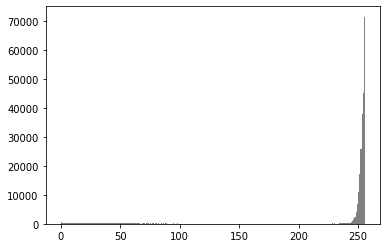

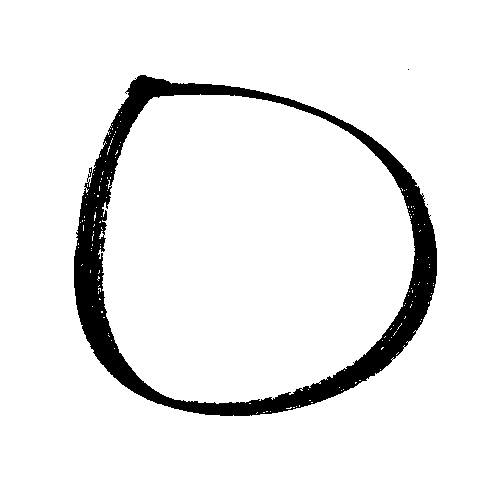

In [ ]:
### 4-2: 判別閾値法による方法

# 準備
bin_img1_3 = np.zeros((rows,cols), np.uint8)  # 2値化結果を記録する白い画像を用意

# 判別閾値法（大津の2値化法）を適用
threshold, bin_img1_3 = cv2.threshold(img1,# 入力画像
                                      0,# 固定閾値（大津の方法の場合は無効）
                                      255,# 最大値（大津の方法の場合は無効）
                                      cv2.THRESH_OTSU# 2値化方法
                                      )          
              
print("Thresh of otsu is",threshold )
 

# ヒストグラムの描画
plt.hist(img1.flatten(),bins=256, range=[0,256], color="gray")
plt.show()

# 2値化結果の画像を表示
cv2_imshow(bin_img1_3)

erosion


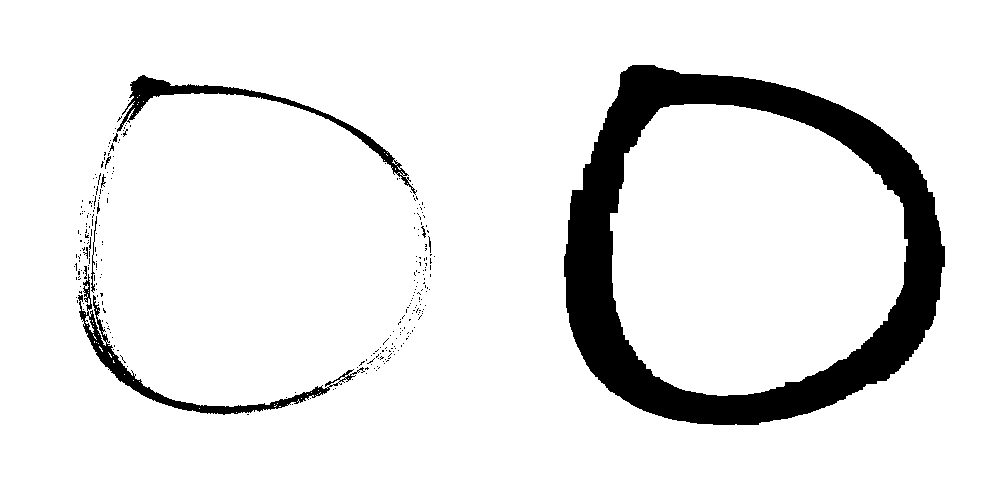

dilation


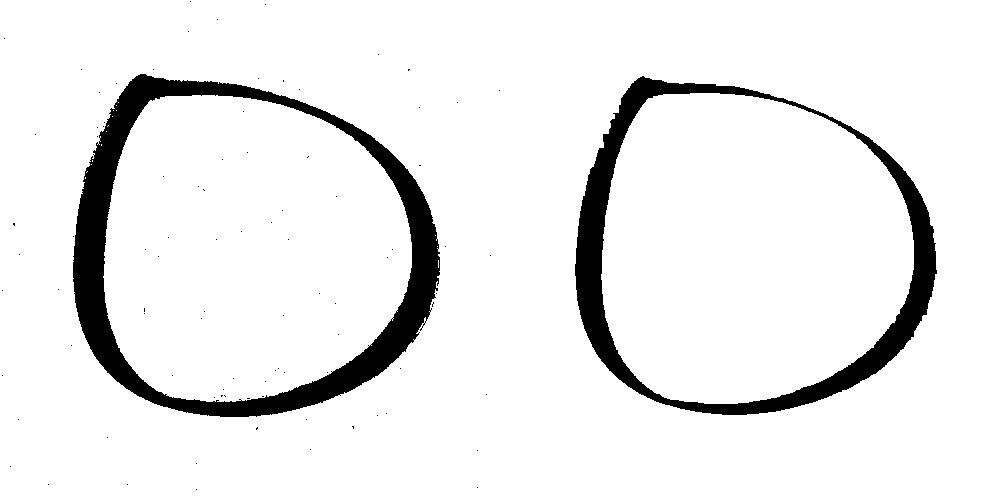

opening/gradient


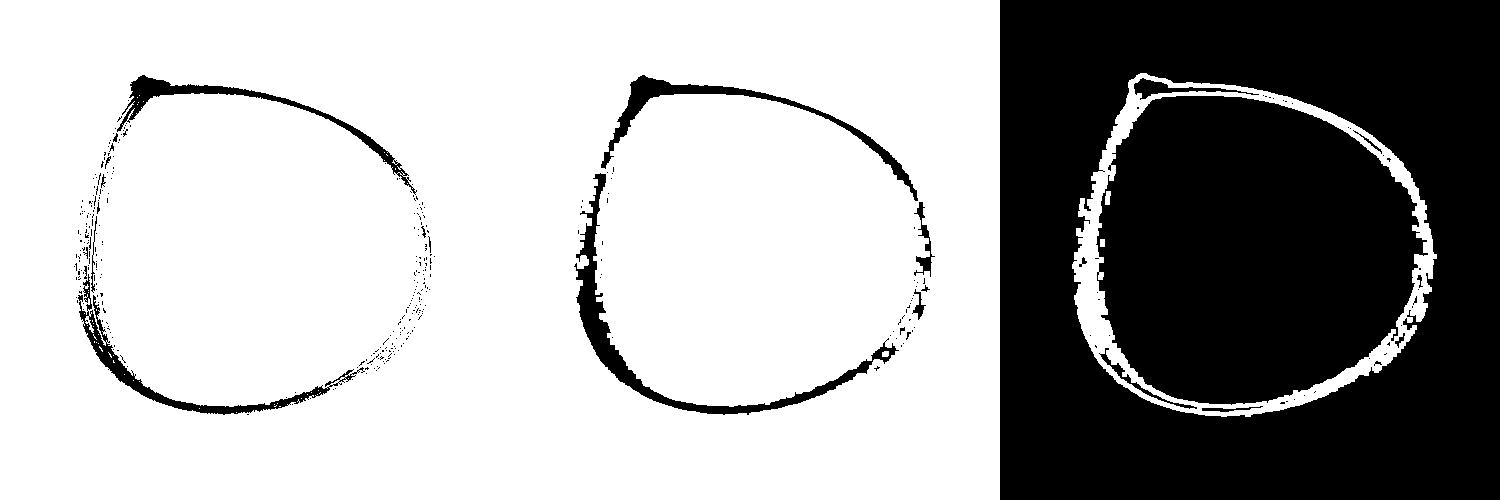

closing/gradient


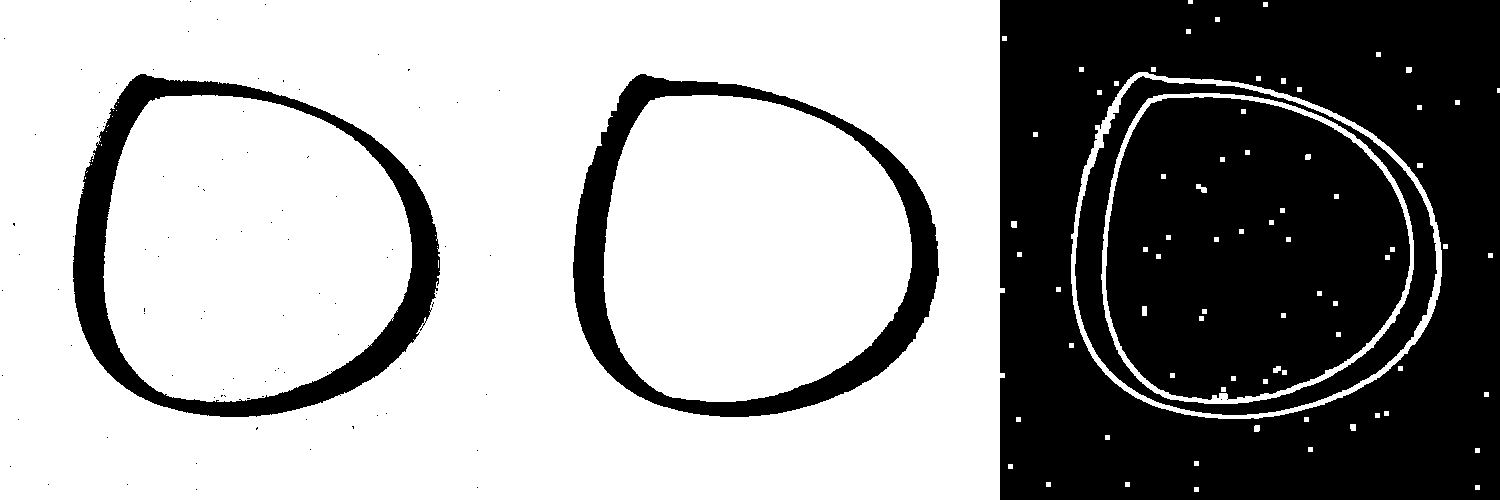

In [ ]:
### 4-3: 膨張・収縮

# 準備
kernel =  np.ones((5,5),np.uint8) # 要素が全て1の5x5のフィルタ（カーネル）を用意

# bin_img1_1を膨張
erosion = cv2.erode(bin_img1_1, kernel, iterations = 5)
figure = np.hstack((bin_img1_1, erosion))
print("erosion")
cv2_imshow(figure)

# bin_img1_2を収縮
dilation = cv2.dilate(bin_img1_2,  kernel, iterations = 1)
figure = np.hstack((bin_img1_2, dilation))
print("dilation")
cv2_imshow(figure)



# bin_img1_1を膨張→収縮（Opening），それらの差分（Gradient）

opening = cv2.morphologyEx(bin_img1_1, cv2.MORPH_OPEN, kernel)
gradient = cv2.morphologyEx(bin_img1_1, cv2.MORPH_GRADIENT, kernel)
figure = np.hstack((bin_img1_1, opening, gradient))
print("opening/gradient")
cv2_imshow(figure)

# bin_img1_2を収縮→膨張（Closing），それらの差分（Gradient）
closing = cv2.morphologyEx((bin_img1_2), cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx((bin_img1_2), cv2.MORPH_GRADIENT, kernel)
figure = np.hstack((bin_img1_2, closing, gradient))
print("closing/gradient")
cv2_imshow(figure)

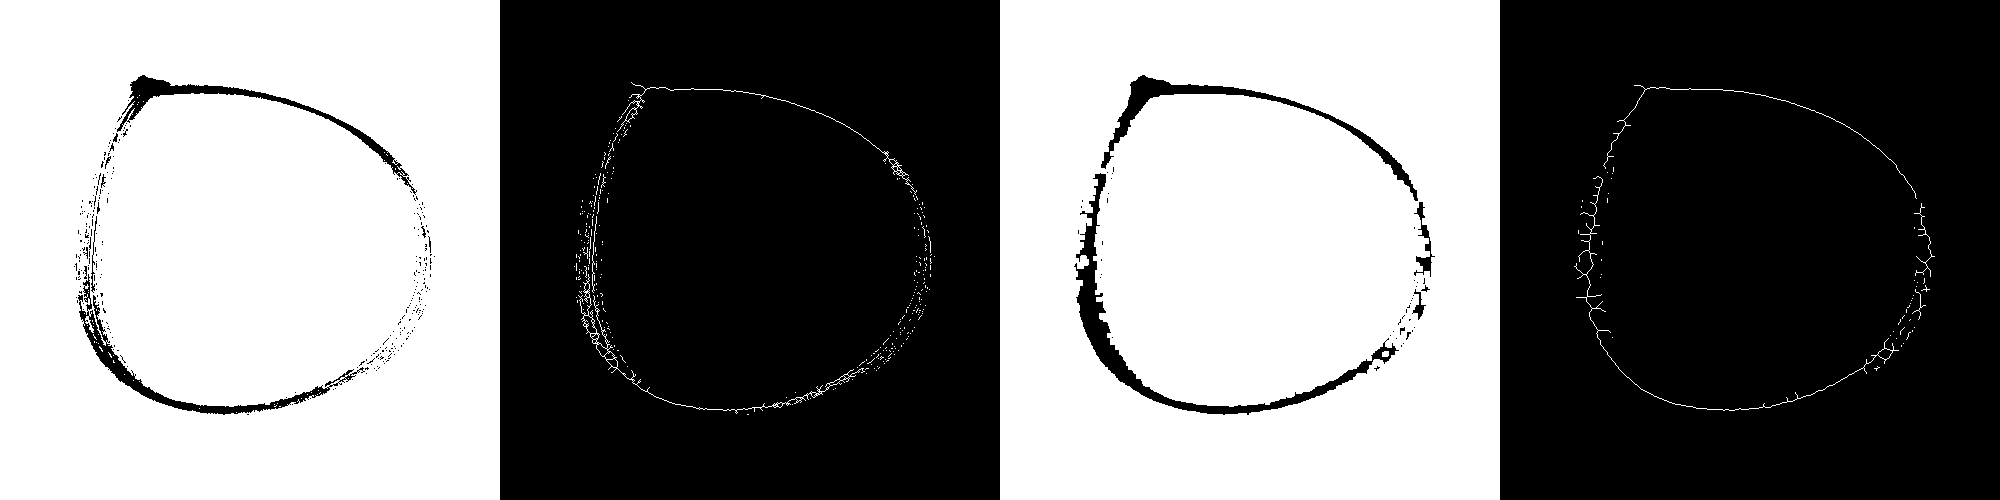

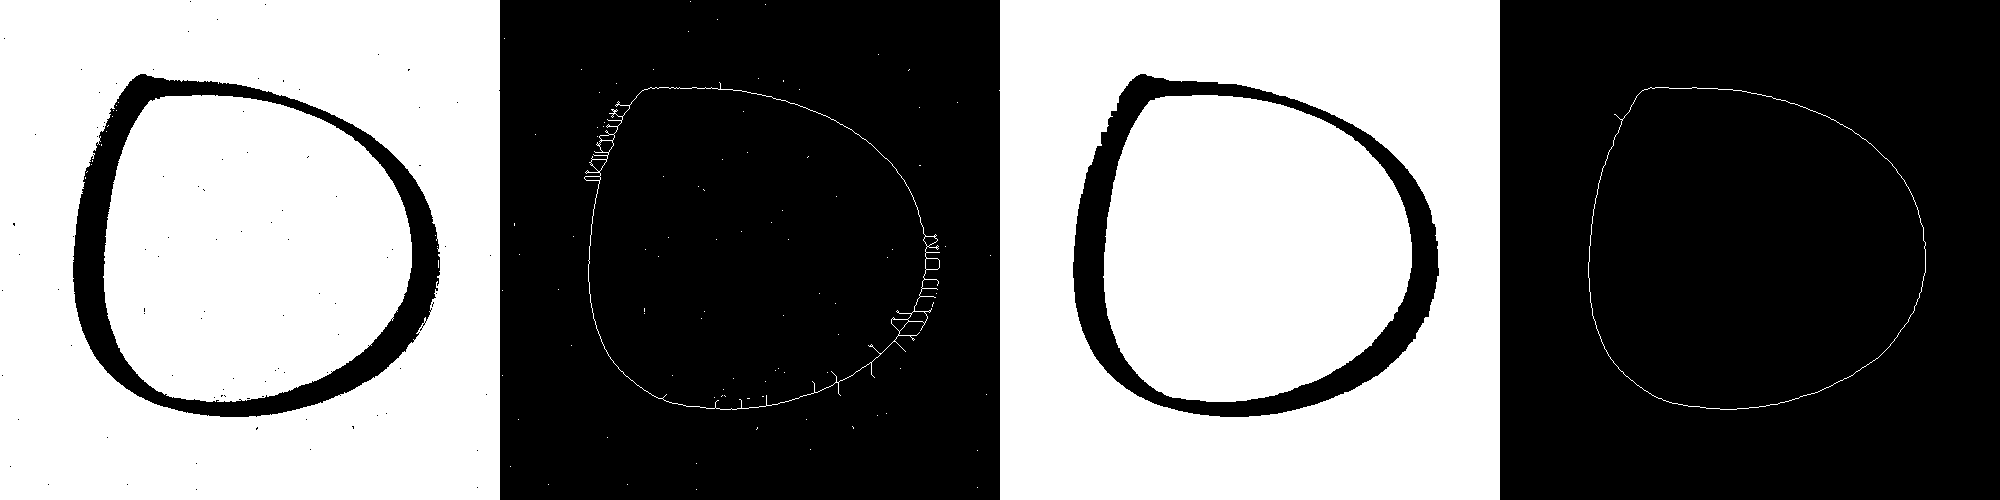

In [ ]:
### 4-4: 細線化

# bin_img1_1を細線化
skeleton_1_1 = cv2.ximgproc.thinning(cv2.bitwise_not(bin_img1_1),
                                    thinningType = cv2.ximgproc.THINNING_GUOHALL)


# Openingしてから細線化
skeleton_op = cv2.ximgproc.thinning(cv2.bitwise_not(opening), thinningType = cv2.ximgproc.THINNING_GUOHALL)
figure  = np.hstack((bin_img1_1, skeleton_1_1, opening,skeleton_op))
cv2_imshow(figure)


# bin_img1_2を細線化
skeleton_1_2 = cv2.ximgproc.thinning(cv2.bitwise_not(bin_img1_2),
                                    thinningType = cv2.ximgproc.THINNING_GUOHALL)



# Closingしてから細線化
skeleton_cl = cv2.ximgproc.thinning(cv2.bitwise_not(closing), thinningType = cv2.ximgproc.THINNING_GUOHALL)
figure  = np.hstack((bin_img1_2, skeleton_1_2, closing,skeleton_cl))
cv2_imshow(figure)

number of labels: 3


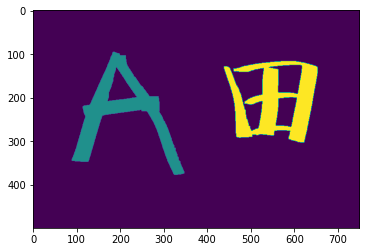

In [ ]:
### 4-5: ラベリング

# 準備
bin_img2 = np.zeros((rows,cols), np.uint8) # ラベリング結果を記録する白い画像を用意
threshold, bin_img2 = cv2.threshold(img2,0,255,cv2.THRESH_OTSU) # 判別閾値法を適用して2値化
closing = cv2.morphologyEx(bin_img2, cv2.MORPH_CLOSE, kernel) # Closing
closing = cv2.bitwise_not(closing) # 白黒反転

# 連結成分のラベリング
n_labels, labeled = cv2.connectedComponents(closing)
# ラベリング結果の表示

print("number of labels:", n_labels)
fig, ax = plt.subplots() # 描画領域を用意
ax.imshow(labeled) # ラベル画像を読込
plt.show() # 描画領域を表示